# Purpose: Predict whether a superhero is from Marvel Comics based on their history and powers text

A (History text + Powers text) -> B (Marvel: Yes / No)

In [41]:
import pandas as pd


# 1 - Load Dataset to Memory

In [56]:
file_path = 'super-heroes-dataset/superheroes_nlp_dataset.csv'
df = pd.read_csv(file_path)


# 1.1 - Explore the data (Get more familiar with the data)

In [57]:
# Print the top few instances
df

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,Zatanna,Zatanna Zatara,Zatanna Zatara,10,Zatanna is the daughter of adventurer John Zat...,Zatanna is genetically talented with her magi...,90,10,25,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1446,Zero,DWN-∞: Zero,DWN-∞: Zero,18,Zero was created by the late Dr. Albert Wily ...,NaN,80,100,100,100,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1447,Zoom (New 52),Hunter Zolomon,NaN,20,"Hunter Zolomon is better known as Zoom, a spee...",After tricking Barry Allen and Wally West into...,95,50,100,75,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1448,Zoom,Hunter Zolomon,Hunter Zolomon,9,Hunter Zolomon had a troubled relationship wi...,"Zoom is able to alter time, to make himself ev...",75,10,100,30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
# Print the data types to get more familiar with the data
df.dtypes

name                   object
real_name              object
full_name              object
overall_score          object
history_text           object
                       ...   
has_super_speed       float64
has_durability        float64
has_stamina           float64
has_agility           float64
has_super_strength    float64
Length: 81, dtype: object

In [45]:
# Print the amount of data
df.shape

(1450, 81)

In [46]:
# Another way to print the top few instances
df.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Filter the data to play with it and understand it better
df[df['creator'] == 'Marvel Comics'].shape

(615, 81)

In [48]:
# Filter the data to play with it and understand it better
df[df['creator']=='Marvel Comics'].head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
8,Abomination,Emil Blonsky,Emil Blonsky,22,"Formerly known as Emil Blonsky, a spy of Sovie...",'Blonsky''s transformation into the Abominatio...,85,100,80,90,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
11,Abraxas,Abraxas,Abraxas,∞,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",100,100,100,100,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
12,Absorbing Man (MCU),Carl Creel,Carl Creel,8,"Carl ""Crusher"" Creel was an enhanced individua...",Carl Creel was able to duplicate at will the ...,75,15,30,40,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


# 2 - Adjust the dataset to train / test set structure

2.1. Create the input data
Combine the textual columns into one column

In [60]:
# The list columns that needs to be combined
text_columns = ['history_text', 'powers_text']

# The two textual columns are  combined into a new column called 'combined_text'. Missing values in these columns are filled with empty strings before combining.
# The .agg(' '.join, axis=1) concatenates the text from the two columns with a space in between.
df['combined_text'] = df[text_columns].fillna('').agg(' '.join, axis=1)

2.2. Create a binary target column

In [61]:
# This line creates a new column 'is_marvel', which is a binary indicator (1 or 0). It's set to 1 if the creator of the superhero is 'Marvel Comics', otherwise 0. This is done using the .apply() method with a lambda function.

# A lambda function, often referred to as an anonymous function, is a small, unnamed function defined with the lambda keyword in Python. Unlike a regular function defined using def, a lambda function is typically a single expression with a concise syntax. Lambda functions are especially useful when you need a simple function for a short period and where it might feel overkill to define a full function using def.
df['is_marvel'] = df['creator'].apply(lambda x: 1 if x == 'Marvel Comics' else 0)

# 3. Split the dataset into train set and test set

In [62]:
# This code splits the dataset into training and test sets, with 20% of the data reserved for testing. The split is done using train_test_split with a random state for reproducibility.

# The random_state parameter in the train_test_split function from Scikit-learn is used to control the randomness of the split into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = (
    train_test_split(df['combined_text'], df['is_marvel'],
                     test_size=0.2,
                     random_state=42))

# 4 & 5 - Feature Extraction and Classification

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [81]:
pipeline = Pipeline([
    # --- FEATURE EXTRACTION ---
    # Case 1: Number of features
    #('bow', CountVectorizer(max_features=100)),

    # Case 2: Lower case usage
    #('bow', CountVectorizer(lowercase=True)),

    # Case 3: Stopwords
    #('bow', CountVectorizer(lowercase=True,stop_words='english')),

    # Case 4: Ngram
    #('bow', CountVectorizer(ngram_range=(1, 10))),

    # Case 5: TF / IDF
    ('tfidf', TfidfVectorizer()),



    # --- CLASSIFICATION ---
    ('lr', LogisticRegression())
    #('dt', DecisionTreeClassifier())
])

# 6 - Train the model

In [82]:
# Fitting the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

# 4, 5 & 6 - Alternative solution

In [53]:
from sklearn.metrics import accuracy_score

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8896551724137931


# 7 - Accuracy test with the test set
Evaluating the model using the score method

In [83]:
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8896551724137931


In [84]:
from sklearn.metrics import classification_report

#model testing
y_pred=pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       176
           1       0.99      0.73      0.84       114

    accuracy                           0.89       290
   macro avg       0.92      0.86      0.88       290
weighted avg       0.90      0.89      0.89       290



# EDA's

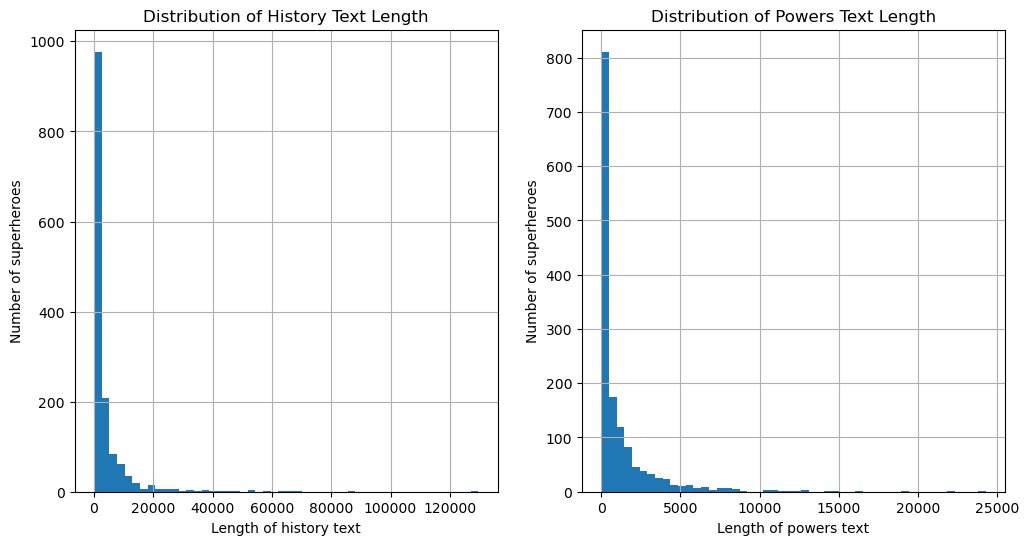

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate text lengths
df['history_length'] = df['history_text'].fillna('').apply(len)
df['powers_length'] = df['powers_text'].fillna('').apply(len)

# Plot histograms of text lengths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['history_length'].hist(bins=50)
plt.title('Distribution of History Text Length')
plt.xlabel('Length of history text')
plt.ylabel('Number of superheroes')

plt.subplot(1, 2, 2)
df['powers_length'].hist(bins=50)
plt.title('Distribution of Powers Text Length')
plt.xlabel('Length of powers text')
plt.ylabel('Number of superheroes')
plt.show()

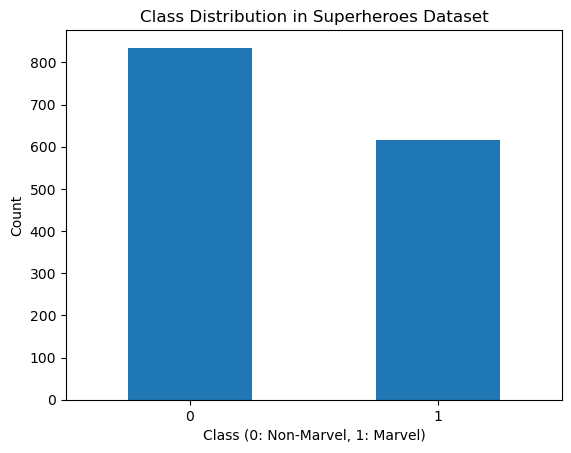

In [39]:

# Count the number of instances in each class
class_counts = df['is_marvel'].value_counts()

# Plot the class distribution
class_counts.plot(kind='bar')
plt.title('Class Distribution in Superheroes Dataset')
plt.xlabel('Class (0: Non-Marvel, 1: Marvel)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Features with lowest tfidf:
['00' 'motions' 'motifs' 'motif' 'motier' 'mothma' 'motherstar'
 'mothership' 'mothers' 'mothering']

Features with highest tfidf: 
['the' 'sonic' 'to' 'and' 'eggman' 'of' 'his' 'wally' 'in' 'with']


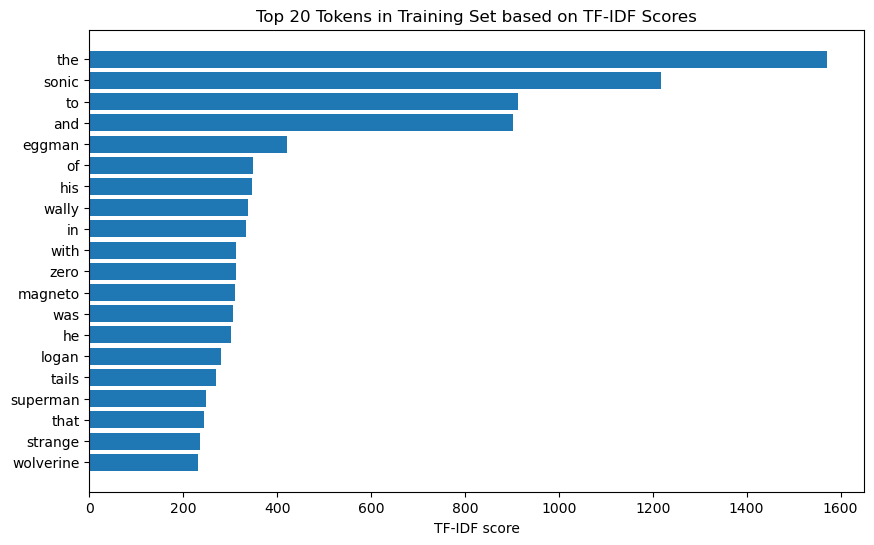

In [22]:
import numpy as np

# Fit TfidfVectorizer on the training data
count = CountVectorizer()
X_train_tfidf = count.fit_transform(X_train)

# Extract feature names and tf-idf scores
feature_names = np.array(count.get_feature_names_out())
sorted_count_index = X_train_tfidf.max(0).toarray()[0].argsort()

# Print the EDA of tokens
print("Features with lowest tfidf:\n{}\n".format(feature_names[sorted_count_index[:10]]))
print("Features with highest tfidf: \n{}".format(feature_names[sorted_count_index[:-11:-1]]))

# Optional: Plotting the top tokens
top_n = 20
top_tokens = feature_names[sorted_count_index[:-top_n-1:-1]]
top_scores = X_train_tfidf.max(0).toarray()[0][sorted_count_index[:-top_n-1:-1]]

plt.figure(figsize=(10, 6))
plt.barh(top_tokens, top_scores)
plt.xlabel('TF-IDF score')
plt.title('Top {} Tokens in Training Set based on TF-IDF Scores'.format(top_n))
plt.gca().invert_yaxis()
plt.show()